# Histogramas en Python

## Histogramas en Python puro

In [1]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [2]:
def count_elements(seq) -> dict:
    """
    Función que cuenta las frecuencias
    de aparición de cada elemento de la
    secuencia, creando un diccionario como
    si fuese una tabla de frecuencias
    """
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

In [3]:
fAbs = count_elements(x)

In [4]:
fAbs

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

In [5]:
from collections import Counter

In [6]:
fAbs2 = Counter(x)

In [7]:
fAbs2

Counter({0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1})

In [8]:
fAbs.items() == fAbs2.items()

True

In [9]:
def ascii_histogram(seq) -> None:
    """
    Un histograma de frecuencias absolutas
    colocado en horizontal y con caracteres ASCII
    """
    fAbs = count_elements(seq)
    for k in sorted(fAbs):
        print('{0:5d} {1}'.format(k, '+'*fAbs[k]))

In [10]:
ascii_histogram(x)

    0 +
    1 +++
    2 ++
    3 +
    7 +++
   25 +


In [11]:
import random
random.seed(2019)

In [12]:
vals = [1,2,3,5,7,8,9,10]
freqs = (random.randint(5,20) for _ in vals)

In [13]:
data = []
for k, v in zip(vals, freqs):
    data.extend([k]*v)

In [14]:
ascii_histogram(data)

    1 +++++++++
    2 ++++++++++++
    3 ++++++++++++++++++++
    5 ++++++++++
    7 ++++++++++++
    8 ++++++++++++
    9 +++++++++++++++
   10 ++++++++++++++


## Histograma con NumPy

In [15]:
import numpy as np

In [16]:
np.random.seed(2019)

In [17]:
np.set_printoptions(precision=3)

In [18]:
x = np.random.laplace(loc=10, scale=3, size=1000)

In [19]:
x[:10]

array([14.935,  9.278, 10.855, 10.968, 14.294,  8.459, 11.555, 14.926,
       14.316,  9.373])

In [20]:
hist, bin_edges = np.histogram(x)

In [21]:
hist

array([  1,   0,   0,   8,  48, 194, 542, 167,  31,   9])

In [22]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [23]:
hist.size, bin_edges.size

(10, 11)

In [24]:
min_edge = x.min()
max_edge = x.max()

In [25]:
n_bins = 10
bin_edges = np.linspace(start= min_edge, stop= max_edge, num= n_bins+1, endpoint= True) 

In [26]:
bin_edges

array([-19.167, -14.642, -10.118,  -5.593,  -1.069,   3.455,   7.98 ,
        12.504,  17.029,  21.553,  26.077])

In [27]:
x = (0,1,1,1,2,2,3,7,7,7,25)

In [28]:
bcount = np.bincount(x)
bcount

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [29]:
hist, _=np.histogram(x, range=(0, max(x)), bins= max(x)+1)

In [30]:
hist

array([1, 3, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [31]:
np.array_equal(bcount, hist)

True

In [32]:
dict(zip(np.unique(x), bcount[bcount.nonzero()]))

{0: 1, 1: 3, 2: 2, 3: 1, 7: 3, 25: 1}

## Visualización de histogramas con matplotlib y Pandas

In [33]:
import matplotlib.pyplot as plt

In [34]:
np.random.seed(2019)
x = np.random.laplace(loc= 10, scale= 3, size= 1000)

(0.0, 140.0)

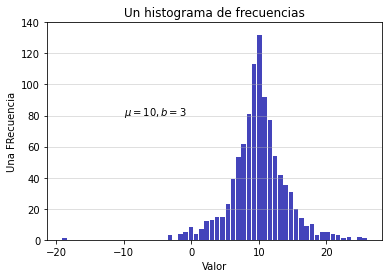

In [35]:
n, bins, patches = plt.hist(x = x, bins= "auto", color= "#0505a5", alpha= 0.75, rwidth= 0.85 )
plt.grid(axis = "y", alpha= 0.5)
plt.xlabel("Valor")
plt.ylabel("Una FRecuencia")
plt.title("Un histograma de frecuencias")
plt.text(-10, 80, r'$\mu=10, b=3$')
maxfreq = n.max()
plt.ylim(ymax= np.ceil(maxfreq/10)*10 if maxfreq%10 else maxfreq + 10)

In [36]:
n

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,
         4.,   5.,   8.,   4.,   7.,  12.,  13.,  15.,  15.,  23.,  39.,
        53.,  62.,  81., 113., 132.,  92.,  77.,  54.,  42.,  35.,  31.,
        20.,  14.,   9.,  10.,   3.,   5.,   5.,   4.,   3.,   1.,   2.,
         0.,   2.,   1.])

In [37]:
bins

array([-19.167, -18.387, -17.606, -16.826, -16.046, -15.266, -14.486,
       -13.706, -12.926, -12.146, -11.366, -10.586,  -9.806,  -9.026,
        -8.246,  -7.466,  -6.685,  -5.905,  -5.125,  -4.345,  -3.565,
        -2.785,  -2.005,  -1.225,  -0.445,   0.335,   1.115,   1.895,
         2.675,   3.455,   4.236,   5.016,   5.796,   6.576,   7.356,
         8.136,   8.916,   9.696,  10.476,  11.256,  12.036,  12.816,
        13.596,  14.376,  15.157,  15.937,  16.717,  17.497,  18.277,
        19.057,  19.837,  20.617,  21.397,  22.177,  22.957,  23.737,
        24.517,  25.297,  26.077])

In [38]:
patches

<BarContainer object of 58 artists>

In [39]:
import pandas as pd

In [40]:
size, scale= 1000, 10
data = pd.Series(np.random.gamma(scale, size= size ))

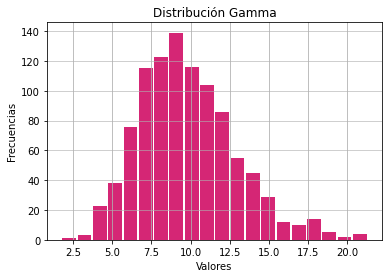

In [41]:
data.plot.hist(grid = True, bins= 20, rwidth= 0.9, color= "#d52675")
plt.title("Distribución Gamma")
plt.ylabel("Frecuencias")
plt.xlabel("Valores")
plt.grid(axis = "y", alpha= 0.75)

## Funciones de densidad y probabilidad

In [42]:
mu = 10, 20
sigma = 5, 2
dis = pd.DataFrame(np.random.normal(loc = mu, scale= sigma, size= (1000, 2)), columns= ['x1', 'x2'])

In [43]:
dis.agg(['min', 'max', 'mean', 'std']).round(decimals= 2)

,x1,x2
min,-5.83,13.84
max,26.05,27.17
mean,9.96,19.89
std,4.97,1.96


<AxesSubplot:title={'center':'Histograma de dos normales'}, ylabel='Density'>

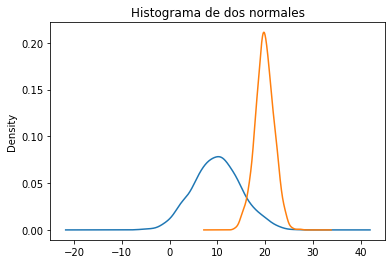

In [44]:
fig, ax = plt.subplots()
dis.plot.kde(ax= ax, legend= False, title = "Histograma de dos normales")

<AxesSubplot:title={'center':'Histograma de dos normales'}, ylabel='Frequency'>

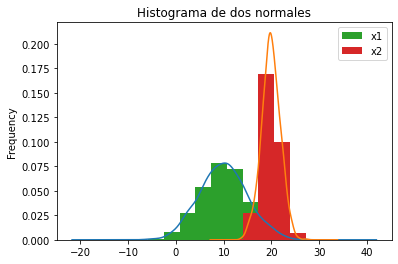

In [45]:
fig, ax = plt.subplots()
dis.plot.kde(ax= ax, legend= False, title = "Histograma de dos normales")
dis.plot.hist(density= True, ax= ax)

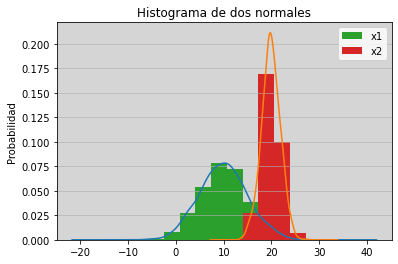

In [46]:
fig, ax = plt.subplots()
dis.plot.kde(ax= ax, legend= False, title = "Histograma de dos normales")
dis.plot.hist(density= True, ax= ax)
ax.set_ylabel("Probabilidad")
ax.grid(axis="y", alpha= 0.75)
ax.set_facecolor("#d5d5d5")

In [47]:
from scipy import stats

In [48]:
dist = stats.norm()# distribucion normal teorica N(0,1) - exp(-x**2/2)/sqrt(2*pi)

In [49]:
sample = dist.rvs(size= 1000)

In [50]:
stats.norm.ppf(0.01)

-2.3263478740408408

In [51]:
stats.norm.ppf(0.99)

2.3263478740408408

In [52]:
x = np.linspace(start= stats.norm.ppf(0.01), stop= stats.norm.ppf(0.99), num= 250)

In [53]:
gkde = stats.gaussian_kde(dataset= sample)

Text(-2.0, 0.35, '$f(x) = \\frac{e^{-x^2/2}}{\\sqrt{2\\pi}}$')

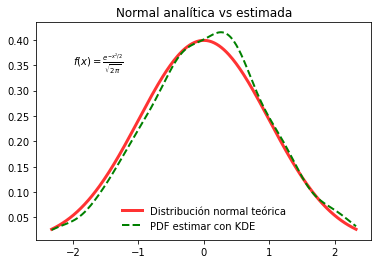

In [54]:
fig, ax= plt.subplots()
ax.plot(x, dist.pdf(x), linestyle= "solid", c= "red", lw= 3, alpha= 0.8, label= "Distribución normal teórica")
ax.plot(x, gkde.evaluate(x), linestyle= "dashed", c= "green", lw= 2, label= "PDF estimar con KDE")
ax.legend(loc= "best", frameon= False)
ax.set_title("Normal analítica vs estimada")
ax.text(-2., 0.35, r'$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}}$')

## Histograma con Seaborn

In [55]:
import seaborn as sb

/home/jhon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

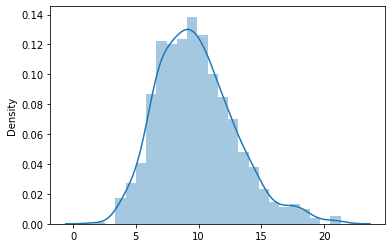

In [56]:
sb.distplot(data)

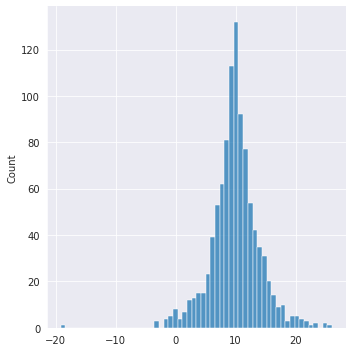

In [57]:
np.random.seed(2019)
x = np.random.laplace(loc= 10, scale= 3, size= 1000)
sb.set_style("darkgrid")
sb.displot(x)

/home/jhon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

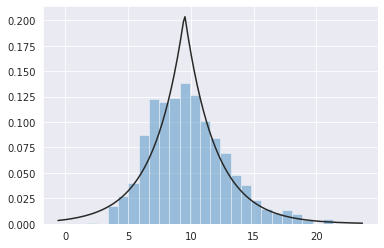

In [59]:
sb.distplot(data, fit= stats.laplace, kde= False)

## Otras formas

In [60]:
data2 = np.random.choice(np.arange(10), size= 1000, p= np.linspace(1, 11, 10)/60)

In [62]:
s = pd.Series(data2)

In [63]:
s.value_counts()

9    206
8    152
7    147
6    118
5     98
4     92
3     87
2     55
1     27
0     18
dtype: int64

In [64]:
s.value_counts(normalize= True)

9    0.206
8    0.152
7    0.147
6    0.118
5    0.098
4    0.092
3    0.087
2    0.055
1    0.027
0    0.018
dtype: float64

In [65]:
ages = pd.Series([1,1,3,5,6,8,9,10,12,15,18,18,18,20,25,30,40,51,52])
bins = (0,10,15,18,21, np.inf)
labels = ('infancia', 'preadolescencia', 'adolescencia', 'universitario', 'adulto')
groups = pd.cut(ages, bins=bins, labels=labels)

In [66]:
groups

0            infancia
1            infancia
2            infancia
3            infancia
4            infancia
5            infancia
6            infancia
7            infancia
8     preadolescencia
9     preadolescencia
10       adolescencia
11       adolescencia
12       adolescencia
13      universitario
14             adulto
15             adulto
16             adulto
17             adulto
18             adulto
dtype: category
Categories (5, object): ['infancia' < 'preadolescencia' < 'adolescencia' < 'universitario' < 'adulto']

In [67]:
groups.value_counts()

infancia           8
adulto             5
adolescencia       3
preadolescencia    2
universitario      1
dtype: int64

In [68]:
pd.concat((ages, groups), axis=1)

,0,1
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia


In [69]:
pd.concat((ages, groups), axis=1).rename(columns={0:'age', 1:'group'})

,age,group
0,1,infancia
1,1,infancia
2,3,infancia
3,5,infancia
4,6,infancia
5,8,infancia
6,9,infancia
7,10,infancia
8,12,preadolescencia
9,15,preadolescencia
